# Notebook 1: Classical Vector Fields

**Part 1 of the GRL Field Series**

---

## Overview

This notebook introduces **vector fields** — a foundational concept for understanding GRL's reinforcement fields.

### Learning Objectives

1. **What is a vector field?** — Arrows at each point in space
2. **Gradient fields** — Following "uphill" directions for optimization
3. **Rotational fields** — Circular flows and curl
4. **Superposition** — Combining multiple fields
5. **Trajectories** — Following a field to find extrema

### Why This Matters for GRL

In GRL, the agent learns a **reinforcement field** $Q^+(z)$ over augmented state-action space. Understanding vector fields provides the intuition for how gradients guide policy improvement.

**Time:** ~20-25 minutes

In [1]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Optional interactivity
INTERACTIVE = False
try:
    import ipywidgets as widgets
    from IPython.display import display
    WIDGETS_AVAILABLE = True
except ImportError:
    WIDGETS_AVAILABLE = False

sns.set_theme(style='whitegrid', context='notebook')
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline
print(f"Libraries loaded. Interactive: {INTERACTIVE and WIDGETS_AVAILABLE}")

Libraries loaded. Interactive: False


---
## Part 1: What is a Vector Field?

A **vector field** assigns a vector (arrow) to every point in space:

$$\mathbf{F}: \mathbb{R}^2 \to \mathbb{R}^2, \quad \mathbf{F}(x, y) = \begin{bmatrix} F_x(x, y) \\ F_y(x, y) \end{bmatrix}$$

At each point $(x, y)$:
- **Direction**: Where the arrow points
- **Magnitude**: How long the arrow is

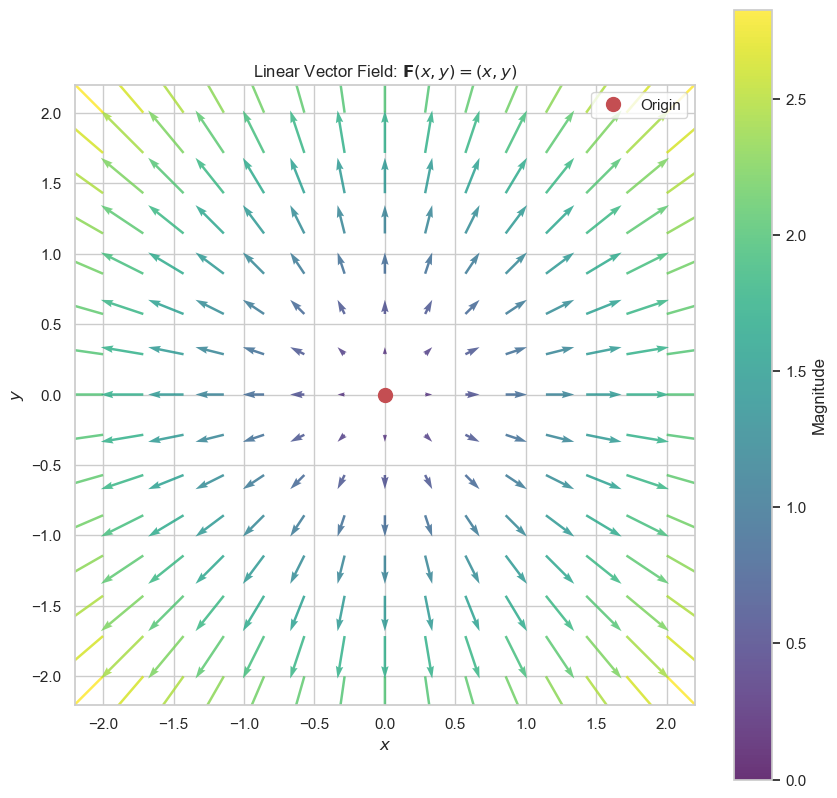

Arrows point AWAY from origin; magnitude increases with distance.


In [2]:
# Example 1.1: Linear Vector Field F(x,y) = (x, y)
x = np.linspace(-2, 2, 15)
y = np.linspace(-2, 2, 15)
X, Y = np.meshgrid(x, y)
U, V = X, Y  # F(x,y) = (x, y)
magnitude = np.sqrt(U**2 + V**2)

fig, ax = plt.subplots(figsize=(10, 10))
quiver = ax.quiver(X, Y, U, V, magnitude, cmap='viridis', alpha=0.8, scale=25)
ax.plot(0, 0, 'ro', markersize=10, label='Origin')
ax.set_xlabel('$x$'); ax.set_ylabel('$y$')
ax.set_title(r'Linear Vector Field: $\mathbf{F}(x,y) = (x, y)$')
ax.set_aspect('equal'); ax.legend()
plt.colorbar(quiver, label='Magnitude')
plt.show()
print("Arrows point AWAY from origin; magnitude increases with distance.")

---
## Part 2: Gradient Fields

Given a scalar potential $V(x, y)$, its **gradient** is:

$$\nabla V = \begin{bmatrix} \partial V / \partial x \\ \partial V / \partial y \end{bmatrix}$$

**Key property:** $\nabla V$ points in the direction of **steepest ascent**.

### GRL Connection
In GRL, $Q^+(s, a)$ is like a potential. Its gradient $\nabla_a Q^+$ tells us how to improve actions!

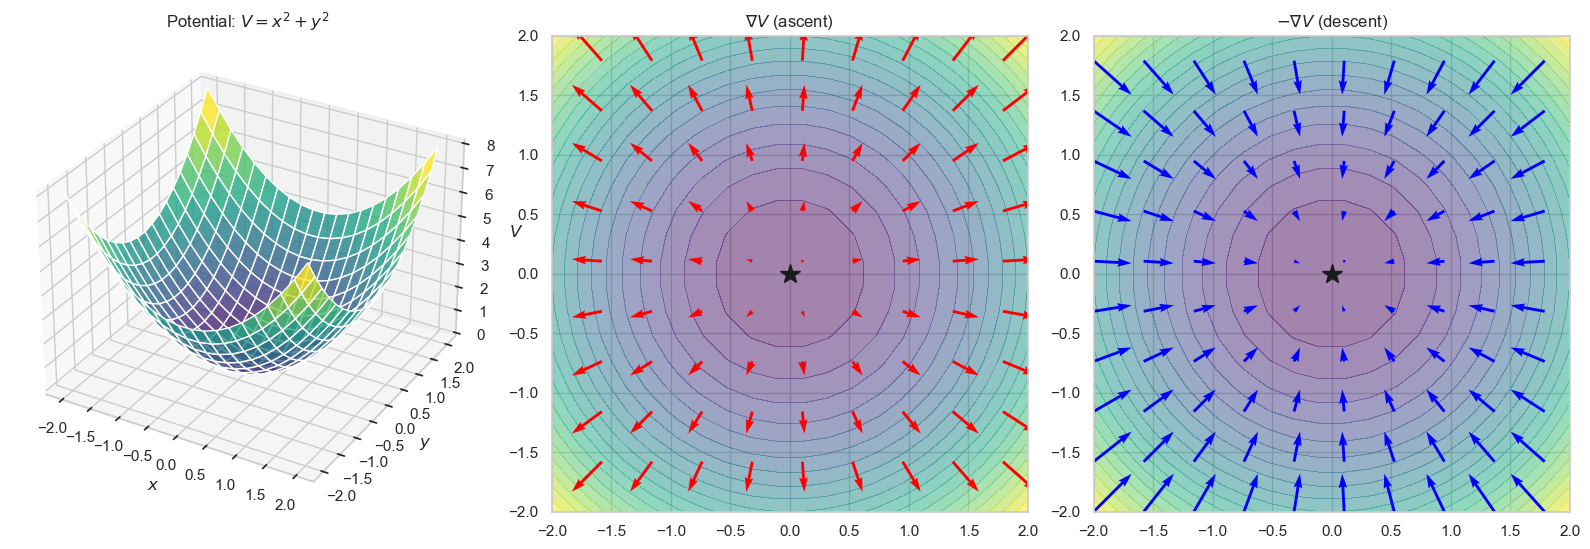

Red=ascent (uphill), Blue=descent (downhill). At minimum: gradient=0.


In [3]:
# Example 2.1: Gradient of Parabolic Bowl V(x,y) = x² + y²
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2  # Potential
U, V = 2*X, 2*Y  # Gradient

fig = plt.figure(figsize=(16, 6))

# 3D Surface
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_xlabel('$x$'); ax1.set_ylabel('$y$'); ax1.set_zlabel('$V$')
ax1.set_title(r'Potential: $V = x^2 + y^2$')

# Gradient field (ascent)
ax2 = fig.add_subplot(132)
ax2.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.5)
ax2.quiver(X[::2,::2], Y[::2,::2], U[::2,::2], V[::2,::2], color='red', scale=50)
ax2.plot(0, 0, 'k*', markersize=15)
ax2.set_title(r'$\nabla V$ (ascent)'); ax2.set_aspect('equal')

# Negative gradient (descent)
ax3 = fig.add_subplot(133)
ax3.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.5)
ax3.quiver(X[::2,::2], Y[::2,::2], -U[::2,::2], -V[::2,::2], color='blue', scale=50)
ax3.plot(0, 0, 'k*', markersize=15)
ax3.set_title(r'$-\nabla V$ (descent)'); ax3.set_aspect('equal')

plt.tight_layout(); plt.show()
print("Red=ascent (uphill), Blue=descent (downhill). At minimum: gradient=0.")

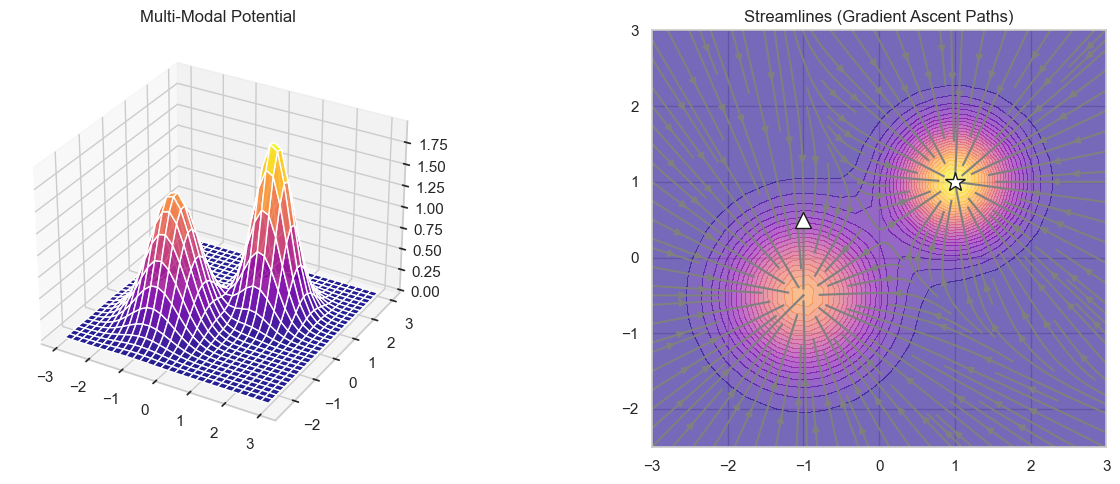

Multiple peaks = multiple 'good' regions. Gradient points to nearest peak.


In [4]:
# Example 2.2: Multi-Modal Potential (Two Peaks)
def multimodal(X, Y):
    return 2*np.exp(-((X-1)**2+(Y-1)**2)/0.5) + 1.5*np.exp(-((X+1)**2+(Y+0.5)**2)/0.8)

x = np.linspace(-3, 3, 30)
y = np.linspace(-2.5, 3, 30)
X, Y = np.meshgrid(x, y)
Z = multimodal(X, Y)

# Numerical gradient
eps = 1e-5
U = (multimodal(X+eps, Y) - multimodal(X-eps, Y)) / (2*eps)
V = (multimodal(X, Y+eps) - multimodal(X, Y-eps)) / (2*eps)

fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='plasma', alpha=0.9)
ax1.set_title('Multi-Modal Potential')

ax2 = fig.add_subplot(122)
ax2.contourf(X, Y, Z, levels=25, cmap='plasma', alpha=0.6)
ax2.streamplot(X, Y, U, V, color='gray', density=1.5)
ax2.plot(1, 1, 'w*', markersize=15, markeredgecolor='k')
ax2.plot(-1, 0.5, 'w^', markersize=12, markeredgecolor='k')
ax2.set_title('Streamlines (Gradient Ascent Paths)'); ax2.set_aspect('equal')
plt.tight_layout(); plt.show()
print("Multiple peaks = multiple 'good' regions. Gradient points to nearest peak.")

---
## Part 3: Rotational Fields

Not all fields come from gradients. **Rotational fields** have circular flow:

$$\mathbf{F}(x, y) = (-y, x) \quad \text{(counterclockwise)}$$

The **curl** measures rotation: $\text{curl}(\mathbf{F}) = \partial F_y/\partial x - \partial F_x/\partial y$

**GRL insight:** GRL's field is a gradient field (curl=0), so it always points toward/away from extrema.

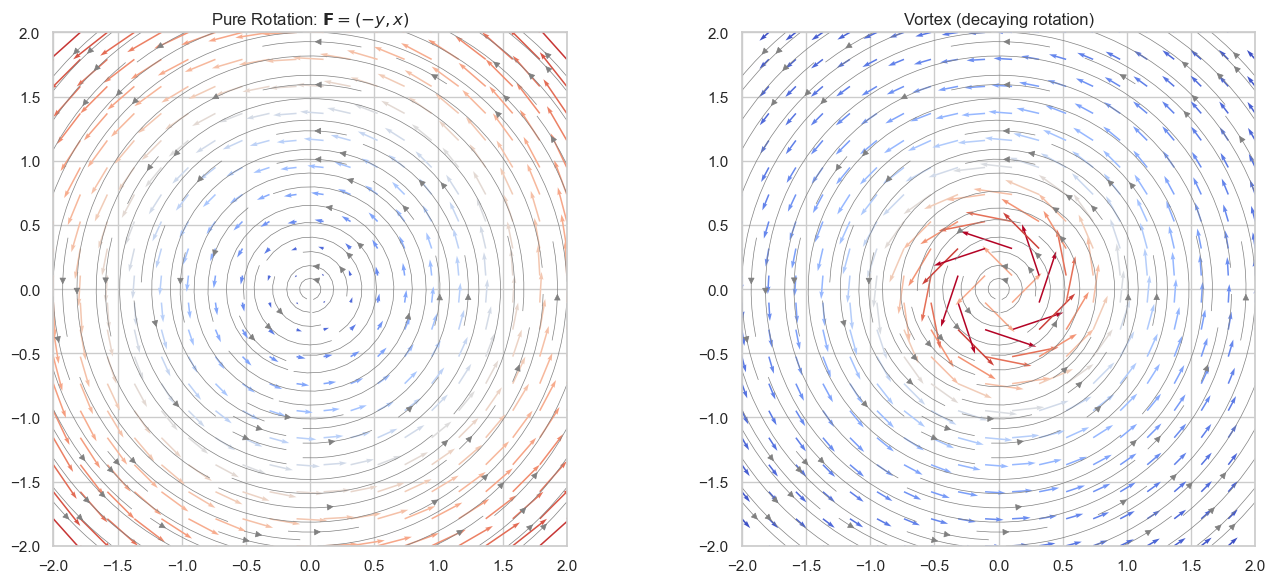

Rotational fields have curl≠0. GRL's Q⁺ is a gradient field (curl=0).


In [6]:
# Example 3.1: Rotational Fields
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pure rotation
U, V = -Y, X
axes[0].quiver(X, Y, U, V, np.sqrt(U**2+V**2), cmap='coolwarm', scale=30)
axes[0].streamplot(X, Y, U, V, color='gray', density=1.2, linewidth=0.5)
axes[0].set_title(r'Pure Rotation: $\mathbf{F} = (-y, x)$'); axes[0].set_aspect('equal')

# Vortex
r2 = X**2 + Y**2 + 0.1
U, V = -Y/r2, X/r2
axes[1].quiver(X, Y, U, V, np.sqrt(U**2+V**2), cmap='coolwarm', scale=15)
axes[1].streamplot(X, Y, U, V, color='gray', density=1.2, linewidth=0.5)
axes[1].set_title('Vortex (decaying rotation)'); axes[1].set_aspect('equal')

plt.tight_layout(); plt.show()
print("Rotational fields have curl≠0. GRL's Q⁺ is a gradient field (curl=0).")

---
## Part 4: Superposition

Vector fields can be **added**:

$$\mathbf{F}_{\text{total}} = \mathbf{F}_1 + \mathbf{F}_2$$

### GRL's Superposition

The reinforcement field is a superposition of particle influences:

$$Q^+(z) = \sum_{i=1}^{N} w_i \, k(z, z_i)$$

Each particle contributes a "bump" (kernel), and the total field is their sum.

/var/folders/jt/h4k6wdyx36nbnjk_rmkwdk280000gn/T/ipykernel_6645/1186539114.py:46: UserWarning: Glyph 8314 (\N{SUPERSCRIPT PLUS SIGN}) missing from font(s) Arial.
  plt.tight_layout(); plt.show()
/Users/pleiadian53/miniforge3-new/envs/grl/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8314 (\N{SUPERSCRIPT PLUS SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


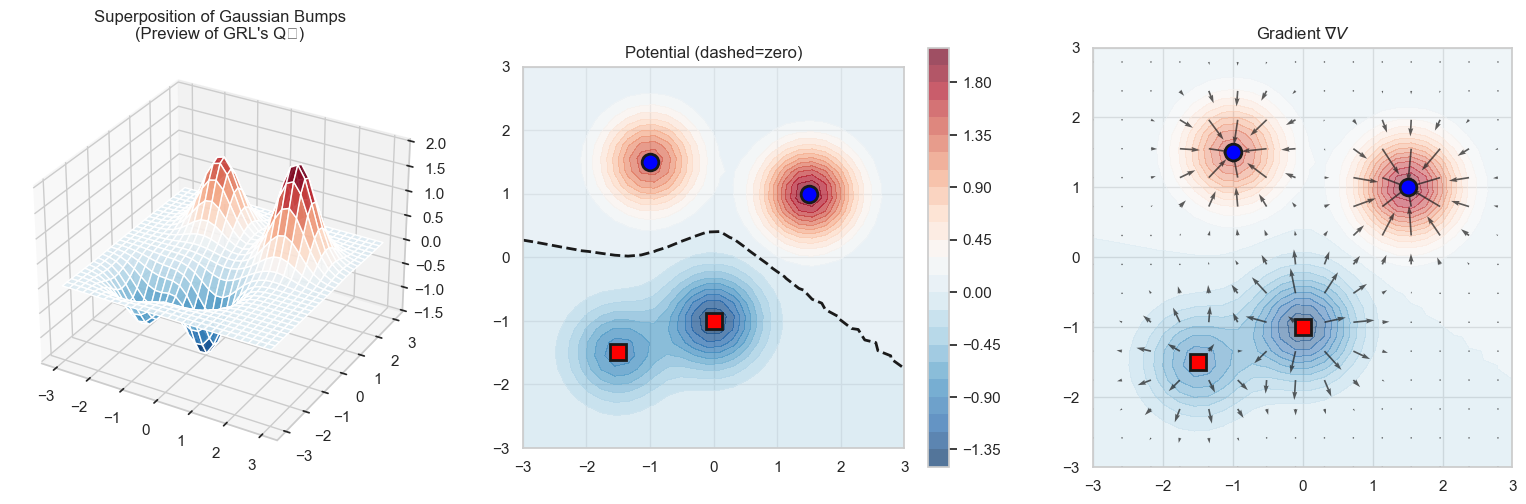

This IS how GRL works! Q⁺(z) = Σᵢ wᵢ k(z, zᵢ)
Blue=positive (good), Red=negative (bad). Gradient → high-value regions.


In [7]:
# Example 4.1: Superposition of Gaussian Bumps (Preview of GRL!)
def gaussian_bump(X, Y, x0, y0, w, l=0.5):
    return w * np.exp(-((X-x0)**2 + (Y-y0)**2) / (2*l**2))

def gaussian_grad(X, Y, x0, y0, w, l=0.5):
    bump = gaussian_bump(X, Y, x0, y0, w, l)
    return -w/(l**2) * (X-x0) * bump / w, -w/(l**2) * (Y-y0) * bump / w

x = np.linspace(-3, 3, 30)
y = np.linspace(-3, 3, 30)
X, Y = np.meshgrid(x, y)

# Particles: (x, y, weight, color)
particles = [(1.5, 1.0, 2.0, 'blue'), (-1.0, 1.5, 1.5, 'blue'),
             (0.0, -1.0, -1.5, 'red'), (-1.5, -1.5, -1.0, 'red')]

Z = sum(gaussian_bump(X, Y, p[0], p[1], p[2]) for p in particles)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='RdBu_r', alpha=0.9)
ax1.set_title("Superposition of Gaussian Bumps\n(Preview of GRL's Q⁺)")

ax2 = fig.add_subplot(132)
c = ax2.contourf(X, Y, Z, levels=25, cmap='RdBu_r', alpha=0.7)
ax2.contour(X, Y, Z, levels=[0], colors='k', linewidths=2, linestyles='--')
for p in particles:
    ax2.plot(p[0], p[1], 'o' if p[2]>0 else 's', color=p[3], markersize=12, mec='k', mew=2)
ax2.set_title('Potential (dashed=zero)'); ax2.set_aspect('equal')
plt.colorbar(c, ax=ax2)

# Gradient
eps = 1e-5
U = (sum(gaussian_bump(X+eps, Y, p[0], p[1], p[2]) for p in particles) -
     sum(gaussian_bump(X-eps, Y, p[0], p[1], p[2]) for p in particles)) / (2*eps)
V = (sum(gaussian_bump(X, Y+eps, p[0], p[1], p[2]) for p in particles) -
     sum(gaussian_bump(X, Y-eps, p[0], p[1], p[2]) for p in particles)) / (2*eps)

ax3 = fig.add_subplot(133)
ax3.contourf(X, Y, Z, levels=25, cmap='RdBu_r', alpha=0.5)
ax3.quiver(X[::2,::2], Y[::2,::2], U[::2,::2], V[::2,::2], color='k', alpha=0.7, scale=30)
for p in particles:
    ax3.plot(p[0], p[1], 'o' if p[2]>0 else 's', color=p[3], markersize=12, mec='k', mew=2)
ax3.set_title(r'Gradient $\nabla V$'); ax3.set_aspect('equal')

plt.tight_layout(); plt.show()
print("This IS how GRL works! Q⁺(z) = Σᵢ wᵢ k(z, zᵢ)")
print("Blue=positive (good), Red=negative (bad). Gradient → high-value regions.")

---
## Part 5: Trajectories

**Gradient ascent** follows the field to find maxima:

$$x_{t+1} = x_t + \eta \nabla V(x_t)$$

In GRL, the agent "climbs" the $Q^+$ landscape to find optimal actions.

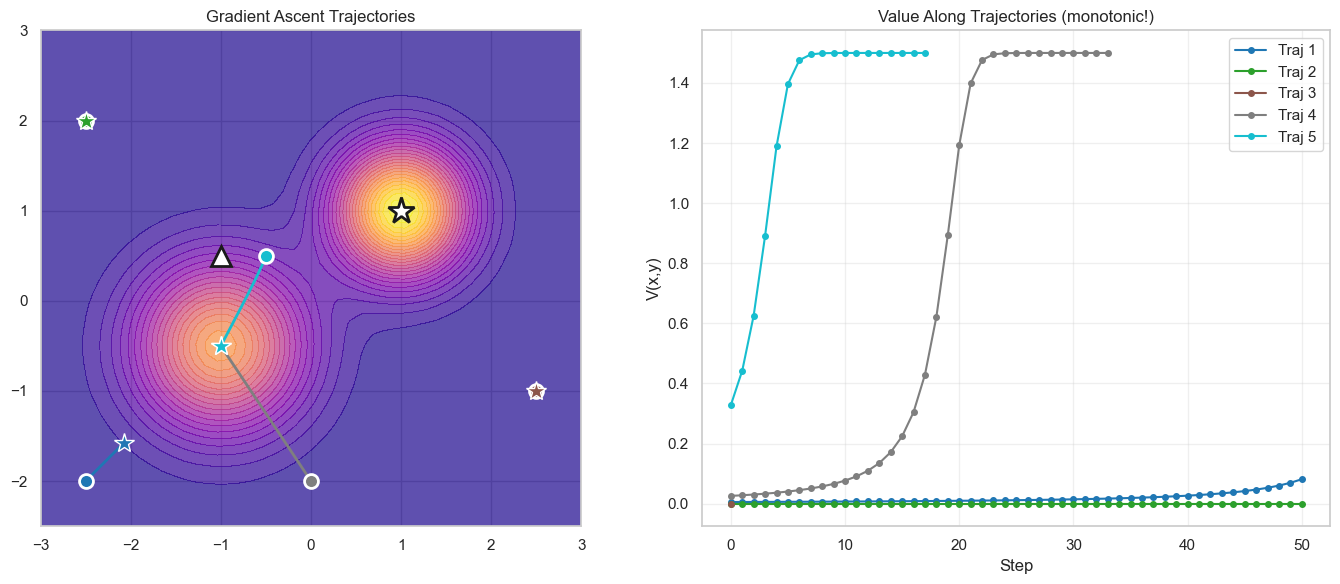

Different starts → different peaks. Value always increases along gradient ascent.


In [8]:
# Example 5.1: Gradient Ascent Trajectories
def grad_ascent(start, grad_func, lr=0.15, steps=50):
    traj = [start.copy()]
    x = start.copy()
    for _ in range(steps):
        g = np.array(grad_func(x[0], x[1]))
        if np.linalg.norm(g) < 1e-4: break
        x = x + lr * g
        traj.append(x.copy())
    return np.array(traj)

def mm_grad(x, y):
    eps = 1e-5
    return ((multimodal(x+eps,y)-multimodal(x-eps,y))/(2*eps),
            (multimodal(x,y+eps)-multimodal(x,y-eps))/(2*eps))

x = np.linspace(-3, 3, 50)
y = np.linspace(-2.5, 3, 50)
X, Y = np.meshgrid(x, y)
Z = multimodal(X, Y)

starts = [np.array([-2.5,-2]), np.array([-2.5,2]), np.array([2.5,-1]),
          np.array([0,-2]), np.array([-0.5,0.5])]
trajs = [grad_ascent(s, mm_grad) for s in starts]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
colors = plt.cm.tab10(np.linspace(0, 1, len(trajs)))

ax1 = axes[0]
ax1.contourf(X, Y, Z, levels=30, cmap='plasma', alpha=0.7)
for i, t in enumerate(trajs):
    ax1.plot(t[:,0], t[:,1], '-', color=colors[i], lw=2)
    ax1.plot(t[0,0], t[0,1], 'o', color=colors[i], ms=10, mec='w', mew=2)
    ax1.plot(t[-1,0], t[-1,1], '*', color=colors[i], ms=15, mec='w')
ax1.plot(1, 1, 'w*', ms=20, mec='k', mew=2)
ax1.plot(-1, 0.5, 'w^', ms=15, mec='k', mew=2)
ax1.set_title('Gradient Ascent Trajectories'); ax1.set_aspect('equal')

ax2 = axes[1]
for i, t in enumerate(trajs):
    vals = [multimodal(p[0], p[1]) for p in t]
    ax2.plot(vals, '-o', color=colors[i], ms=4, label=f'Traj {i+1}')
ax2.set_xlabel('Step'); ax2.set_ylabel('V(x,y)')
ax2.set_title('Value Along Trajectories (monotonic!)'); ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout(); plt.show()
print("Different starts → different peaks. Value always increases along gradient ascent.")

---
## Summary

| Concept | Definition | GRL Connection |
|---------|------------|----------------|
| **Vector Field** | Arrow at each point | Gradient of $Q^+$ gives improvement direction |
| **Gradient** | $\nabla V$ = steepest ascent | $\nabla_a Q^+$ improves actions |
| **Superposition** | $\mathbf{F} = \sum_i \mathbf{F}_i$ | $Q^+ = \sum_i w_i k(z, z_i)$ |
| **Trajectories** | $x_{t+1} = x_t + \eta \nabla V$ | Policy improvement via gradient |

### Key Equations

$$\nabla V = \begin{bmatrix} \partial V/\partial x \\ \partial V/\partial y \end{bmatrix}, \quad V_{\text{total}} = \sum_i w_i \phi_i(x), \quad Q^+(z) = \sum_i w_i k(z, z_i)$$

**Next:** Notebook 2 — Functional Fields (functions as vectors in RKHS)